In [5]:
!pip install mp-api

DEPRECATION: celery 5.1.2 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
from mp_api.client import MPRester
api_key = "YOUR_API_KEY"

In [8]:
# documentation available at: https://api.materialsproject.org/docs

In [13]:
#We restrict to stable materials on the GGA/GGA+U hull with small bandgaps and metals

mpr = MPRester(api_key)

## -- Alternative directly using energy above hull:
docs = mpr.summary.search(energy_above_hull=(0, 0), fields=["band_gap""composition_reduced"])


/Users/helgesorenstein/mambaforge/lib/python3.10/site-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/6092 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/33990 [00:00<?, ?it/s]

In [78]:
import requests

url = 'https://api.materialsproject.org/materials/summary/'
params = {
  '_fields': 'band_gap,composition_reduced',
  '_all_fields': 'false',
  '_limit':1000
}
headers = {
  'accept': 'application/json',
  'X-API-KEY': '4ud8YgT5zr6QndPtfBOy8FhqvI06T5GF'
}

response = requests.get(url, params=params, headers=headers)


In [88]:
import requests
from tqdm import tqdm
reps = []
for i in tqdm(range(1, 100)):
    url = 'https://api.materialsproject.org/materials/summary/'
    params = {
    '_fields': 'band_gap,composition_reduced',
    '_all_fields': 'false',
    '_limit':1000,
    '_page': i
    }
    headers = {
    'accept': 'application/json',
    'X-API-KEY': '4ud8YgT5zr6QndPtfBOy8FhqvI06T5GF'
    }

    response = requests.get(url, params=params, headers=headers)
    reps.extend(response.json()['data'])

100%|██████████| 99/99 [02:09<00:00,  1.31s/it]


9900

In [79]:
response.json()['data']

[{'composition_reduced': {'Lu': 1.0, 'H': 6.0, 'Cl': 3.0, 'O': 15.0},
  'band_gap': 5.3849},
 {'composition_reduced': {'Cs': 3.0, 'Nd': 1.0, 'Mo': 3.0, 'O': 12.0},
  'band_gap': 3.7419},
 {'composition_reduced': {'Ba': 1.0, 'Pd': 2.0, 'S': 4.0},
  'band_gap': 0.7791999999999999},
 {'composition_reduced': {'Fe': 1.0, 'P': 1.0, 'O': 4.0},
  'band_gap': 2.6721000000000004},
 {'composition_reduced': {'Li': 4.0, 'Co': 3.0, 'Ni': 1.0, 'O': 8.0},
  'band_gap': 0.0},
 {'composition_reduced': {'Na': 7.0,
   'Ta': 3.0,
   'Zn': 1.0,
   'Si': 6.0,
   'O': 24.0},
  'band_gap': 2.5286},
 {'composition_reduced': {'Dy': 1.0, 'Bi': 2.0, 'I': 1.0, 'O': 4.0},
  'band_gap': 1.3667999999999996},
 {'composition_reduced': {'Mg': 1.0, 'H': 12.0, 'Br': 2.0, 'O': 6.0},
  'band_gap': 4.3514},
 {'composition_reduced': {'Nb': 1.0, 'O': 2.0, 'F': 1.0},
  'band_gap': 2.8979999999999997},
 {'composition_reduced': {'Nb': 2.0, 'Cu': 1.0, 'C': 1.0, 'S': 2.0},
  'band_gap': 0.0},
 {'composition_reduced': {'Y': 2.0, 'Mg'

In [90]:
bandgap = []
formula = []
for e in reps:
    bandgap.append(e['band_gap'])
    formula.append(e['composition_reduced'])

In [91]:
elements = []
for f in formula:
    for k in f.keys():
        if k not in elements:
            elements.append(k)

In [92]:
len(elements)

86

In [93]:
elements.index('Mn')

36

In [96]:
import numpy as np
myMat = np.zeros([len(reps),len(elements)])
for i,f in enumerate(formula):
    for k in f.keys():
        myMat[i,elements.index(k)] = f[k]

(array([5.655e+03, 6.280e+02, 5.610e+02, 5.220e+02, 5.040e+02, 4.290e+02,
        3.840e+02, 3.450e+02, 2.320e+02, 2.010e+02, 1.510e+02, 1.060e+02,
        9.700e+01, 3.500e+01, 2.000e+01, 1.600e+01, 8.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00]),
 array([0.     , 0.44011, 0.88022, 1.32033, 1.76044, 2.20055, 2.64066,
        3.08077, 3.52088, 3.96099, 4.4011 , 4.84121, 5.28132, 5.72143,
        6.16154, 6.60165, 7.04176, 7.48187, 7.92198, 8.36209, 8.8022 ]),
 <BarContainer object of 20 artists>)

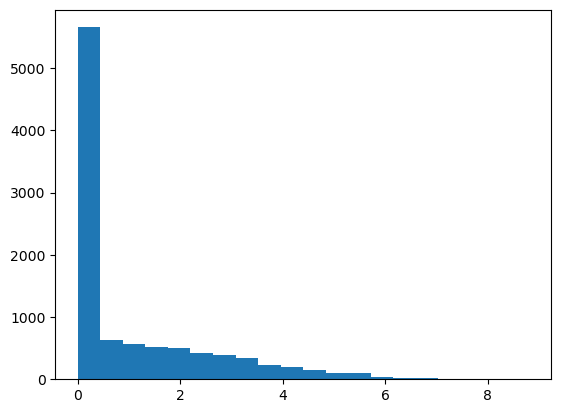

In [97]:
import matplotlib.pyplot as plt

plt.hist(bandgap, bins=20)

(array([4.628e+03, 2.170e+02, 2.600e+02, 0.000e+00, 3.370e+02, 5.190e+02,
        2.160e+02, 0.000e+00, 5.930e+02, 3.160e+02, 0.000e+00, 5.350e+02,
        1.740e+02, 2.140e+02, 0.000e+00, 7.700e+01, 5.150e+02, 0.000e+00,
        6.700e+01, 1.060e+02, 6.800e+01, 0.000e+00, 2.380e+02, 2.500e+01,
        0.000e+00, 5.300e+01, 1.400e+01, 5.700e+01, 0.000e+00, 2.900e+01,
        1.400e+01, 1.100e+01, 0.000e+00, 2.620e+02, 9.000e+00, 0.000e+00,
        4.000e+00, 8.000e+00, 2.500e+01, 0.000e+00, 3.700e+01, 1.900e+01,
        0.000e+00, 1.300e+01, 6.200e+01, 1.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 3.100e+01, 0.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 8.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        6.700e+01, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 8.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

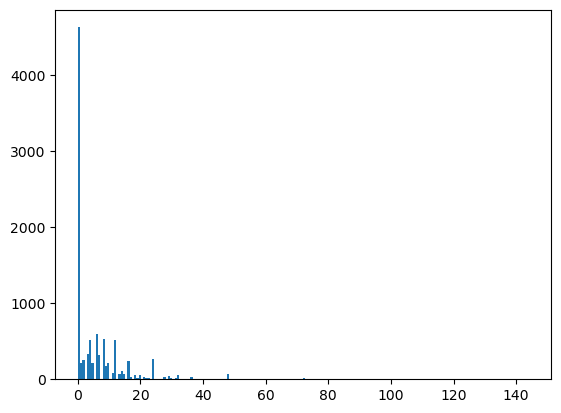

In [100]:
plt.hist(myMat[:,elements.index('O')], bins=200)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(myMat, bandgap, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


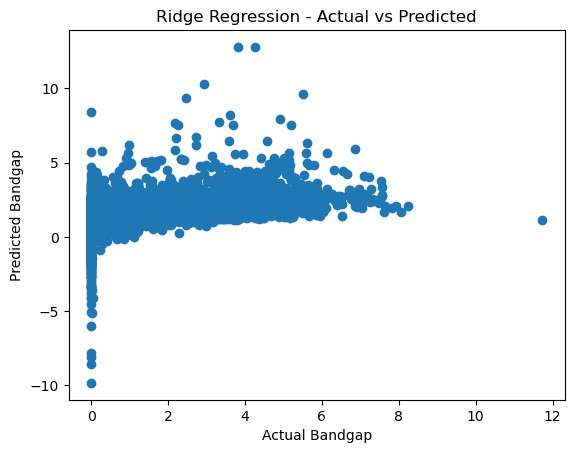

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = ridge_model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)

# Plot the predicted values against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Ridge Regression - Actual vs Predicted')
plt.show()


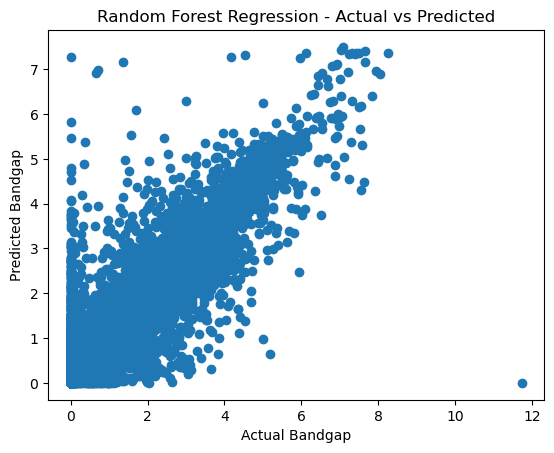

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = rf_model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)


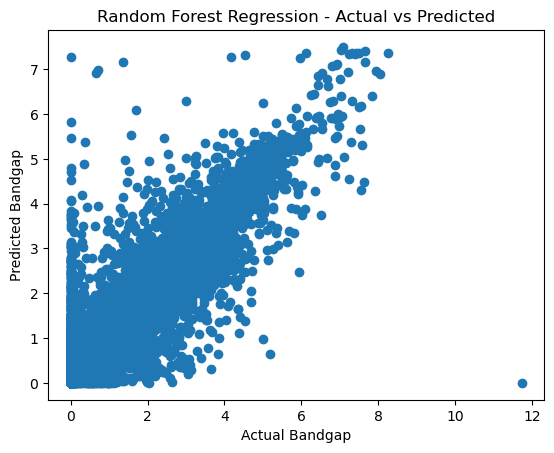

In [33]:

# Plot the predicted values against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Random Forest Regression - Actual vs Predicted')
plt.show()


In [36]:
import numpy as np
embedding_dim = 8
# Generate random embeddings for all elements
embeddings = np.random.rand(len(elements), embedding_dim)

# Calculate the embedding of each composition
composition_embeddings = []
for f in formula:
    composition_embedding = np.zeros(embedding_dim)
    total_weight = 0
    for k, v in f.items():
        element_index = elements.index(k)
        element_embedding = embeddings[element_index]
        composition_embedding += v * element_embedding
        total_weight += v
    composition_embedding /= total_weight
    composition_embeddings.append(composition_embedding)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Convert the composition embeddings list to a numpy array
X = np.array(composition_embeddings)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, bandgap, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

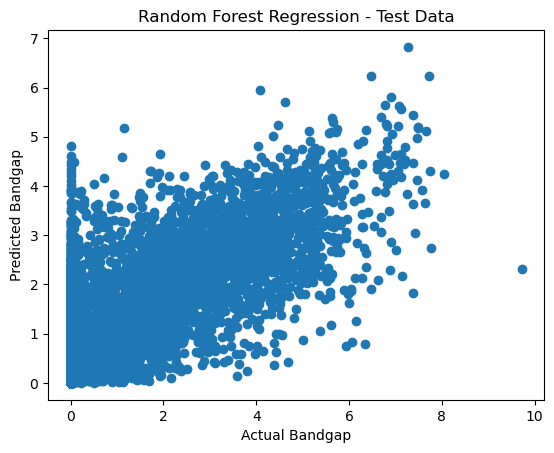

In [40]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Create a scatter plot of the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Random Forest Regression - Test Data')
plt.show()
